## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

# Read the data

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

/tmp/ipython-input-1162196871.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

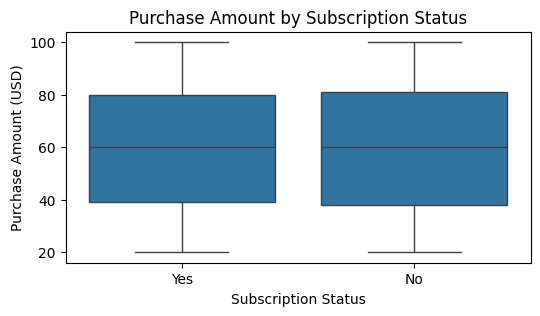

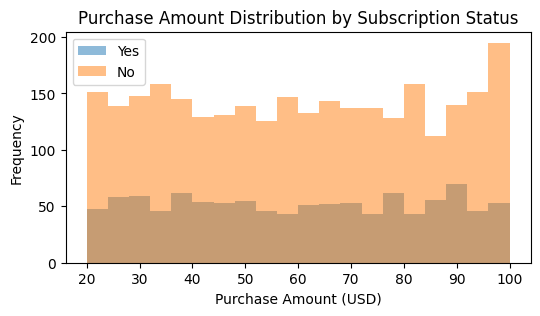

In [8]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x='Subscription Status', y='Purchase Amount (USD)')
plt.title('Purchase Amount by Subscription Status')
plt.ylabel('Purchase Amount (USD)')
plt.xlabel('Subscription Status')
plt.show()




plt.figure(figsize=(6, 3))
for status in df['Subscription Status'].unique():
    subset = df[df['Subscription Status'] == status]['Purchase Amount (USD)']
    plt.hist(subset, bins=20, alpha=0.5, label=status)

plt.title('Purchase Amount Distribution by Subscription Status')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()






# yes there are outliers

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

/tmp/ipython-input-1722536489.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


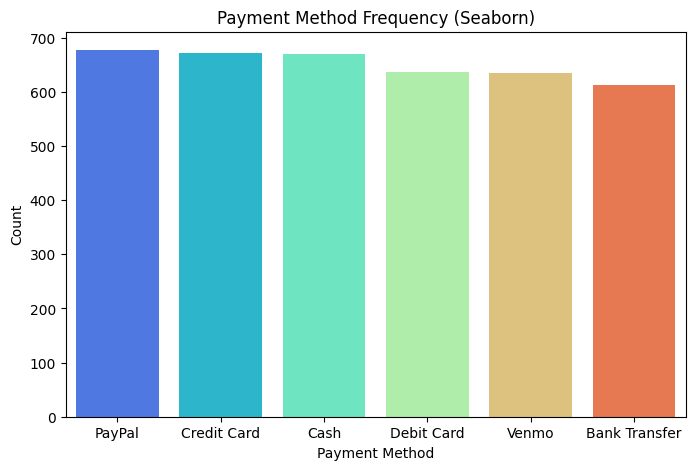

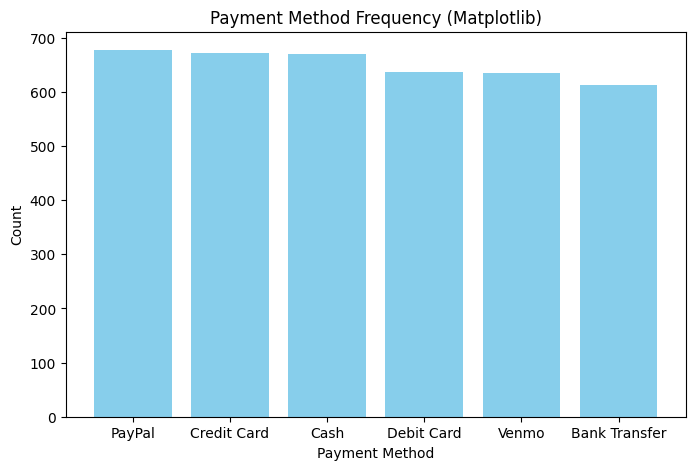

In [14]:


payment_counts = df['Payment Method'].value_counts()

# seaborn
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='Payment Method',
    order=payment_counts.index,
    palette='rainbow'
)
plt.title('Payment Method Frequency (Seaborn)')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

# hist

plt.figure(figsize=(8, 5))
plt.bar(payment_counts.index, payment_counts.values, color='skyblue')
plt.title('Payment Method Frequency (Matplotlib)')
plt.xlabel('Payment Method')
plt.ylabel('Count')

plt.show()



### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

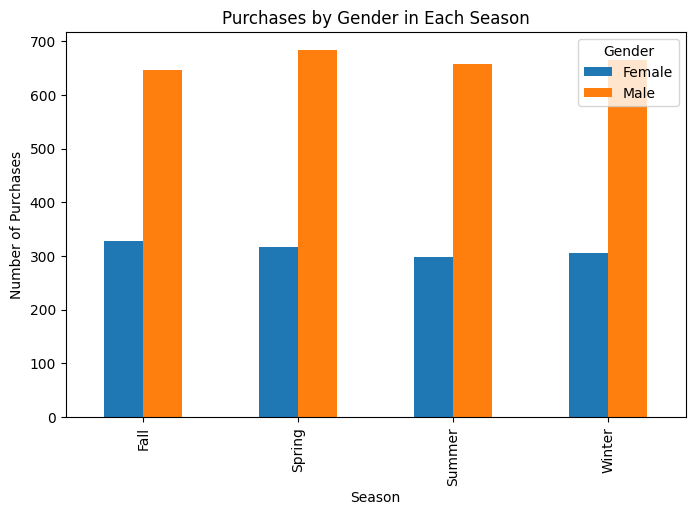

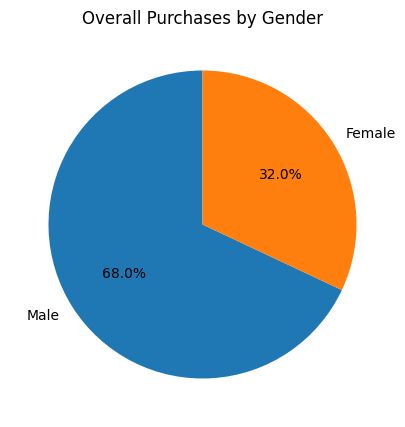

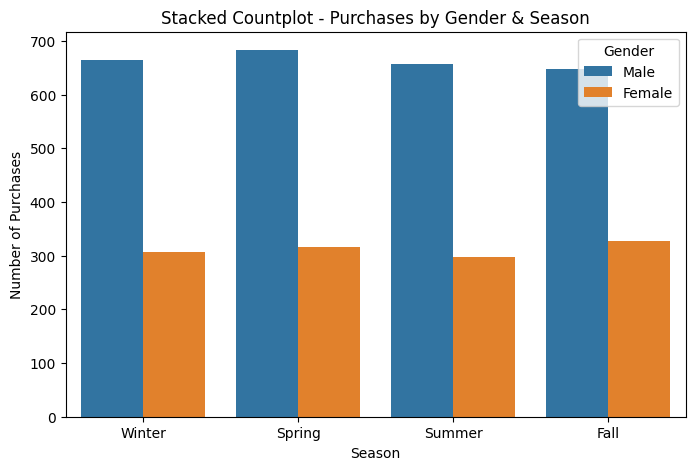

In [15]:



gender_season_counts = df.groupby(['Season', 'Gender']).size().unstack()


# Matplotlib Grouped Bar Chart

gender_season_counts.plot(kind='bar', figsize=(8,5))
plt.title('Purchases by Gender in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.legend(title='Gender')
plt.show()


# Matplotlib Pie Chart

gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Overall Purchases by Gender')
plt.show()


# Seaborn Stacked Countplot

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Season', hue='Gender')
plt.title('Stacked Countplot - Purchases by Gender & Season')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.show()


### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

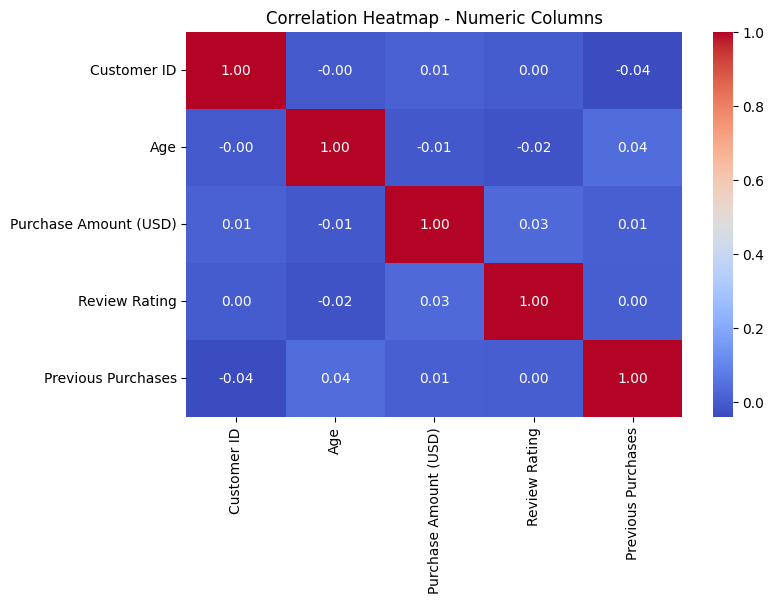

In [17]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()


plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Numeric Columns')
plt.show()


### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

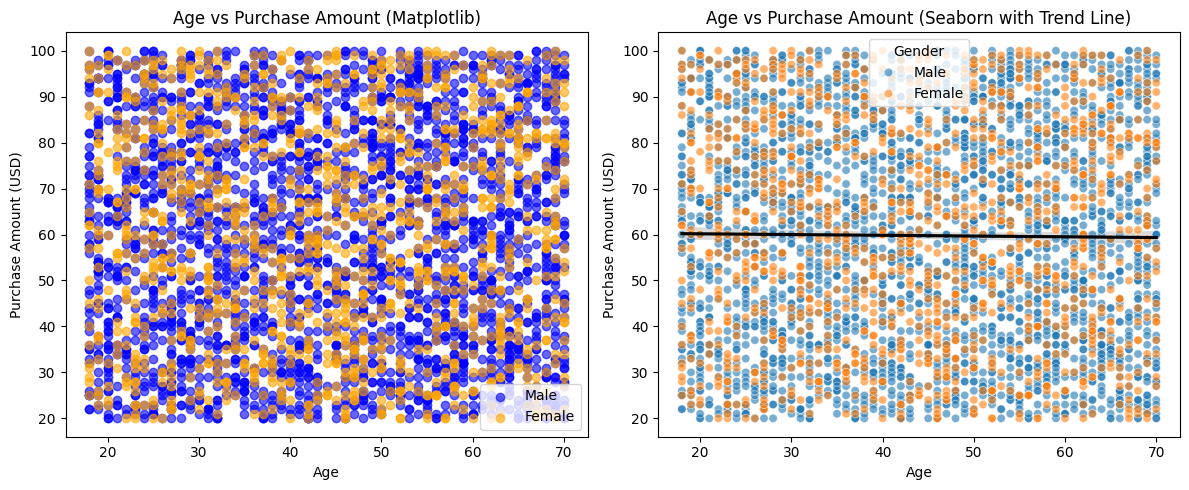

In [18]:

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
genders = df['Gender'].unique()
colors = ['blue', 'orange', 'green']

for gender, color in zip(genders, colors):
    subset = df[df['Gender'] == gender]
    plt.scatter(subset['Age'], subset['Purchase Amount (USD)'], label=gender, alpha=0.6, c=color)

plt.title('Age vs Purchase Amount (Matplotlib)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend()


plt.subplot(1,2,2)
sns.regplot(
    data=df,
    x='Age',
    y='Purchase Amount (USD)',
    scatter=False,
    color='black'
)
sns.scatterplot(
    data=df,
    x='Age',
    y='Purchase Amount (USD)',
    hue='Gender',
    alpha=0.6
)

plt.title('Age vs Purchase Amount (Seaborn with Trend Line)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')

plt.tight_layout()
plt.show()


### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

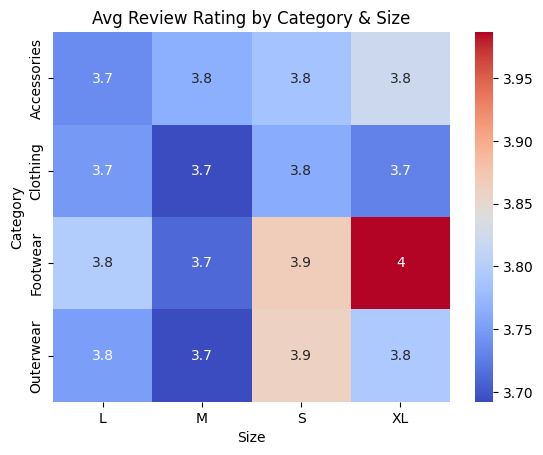

In [35]:
pivot_rating = df.pivot_table(values='Review Rating',
                              index='Category',
                              columns='Size',
                              aggfunc='mean')

sns.heatmap(pivot_rating, annot=True, cmap='coolwarm')
plt.title('Avg Review Rating by Category & Size')
plt.show()


### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

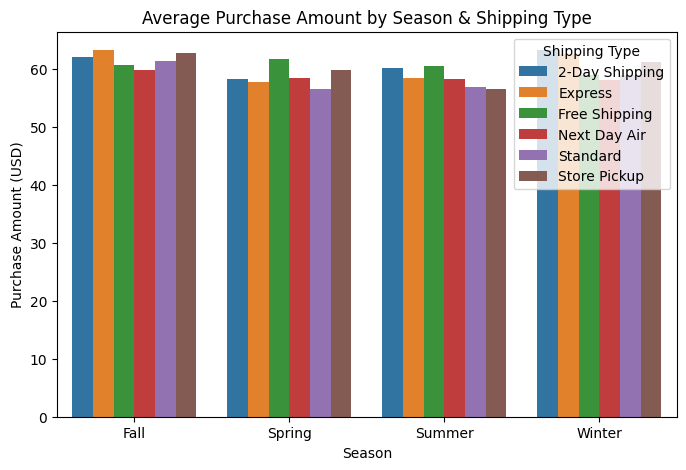

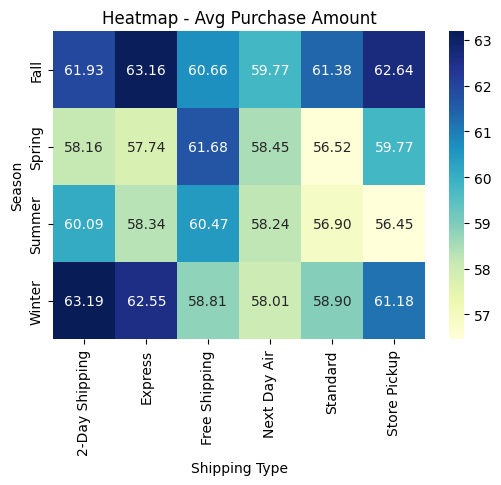

In [19]:

x = df.groupby(['Season', 'Shipping Type'])['Purchase Amount (USD)'].mean().reset_index()


plt.figure(figsize=(8,5))
sns.barplot(data=x, x='Season', y='Purchase Amount (USD)', hue='Shipping Type')
plt.title('Average Purchase Amount by Season & Shipping Type')
plt.show()

y = x.pivot(index='Season', columns='Shipping Type', values='Purchase Amount (USD)')
plt.figure(figsize=(6,4))
sns.heatmap(y, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap - Avg Purchase Amount')
plt.show()


### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

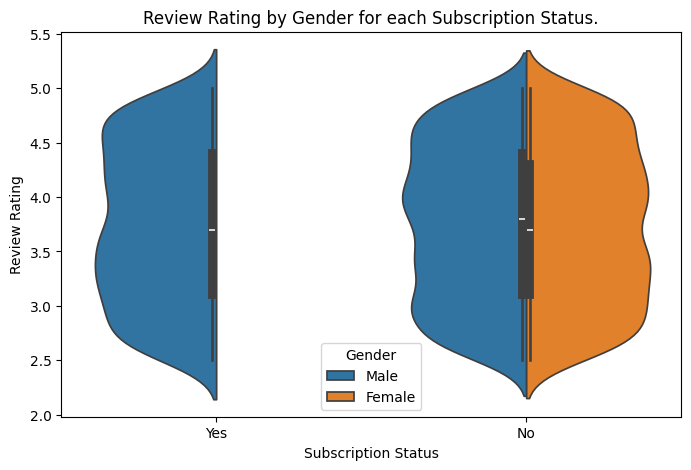

In [21]:
plt.figure(figsize=(8,5))
sns.violinplot(
    data=df,
    x='Subscription Status',
    y='Review Rating',
    hue='Gender',
    split=True
)
plt.title('Review Rating by Gender for each Subscription Status.')
plt.show()


### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

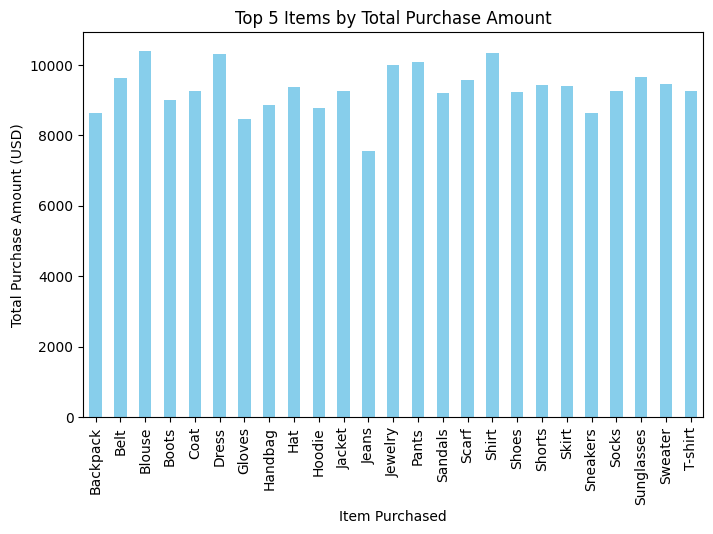

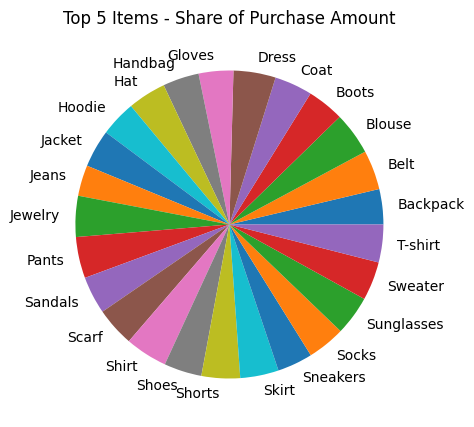

In [23]:

top5_items = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum()

# Bar chart
plt.figure(figsize=(8,5))
top5_items.plot(kind='bar', color='skyblue')
plt.title('Top 5 Items by Total Purchase Amount')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

# Pie chart
plt.figure(figsize=(5,5))
top5_items.plot(kind='pie', )
plt.ylabel('')
plt.title('Top 5 Items - Share of Purchase Amount')
plt.show()


### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

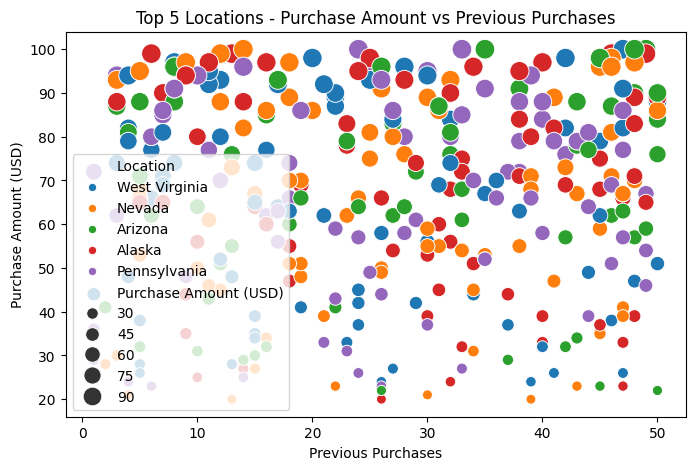

In [26]:

top5_locations = df.groupby('Location')['Purchase Amount (USD)'].mean().nlargest(5).index
loc_df = df[df['Location'].isin(top5_locations)]

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=loc_df,
    x='Previous Purchases',
    y='Purchase Amount (USD)',
    hue='Location',
    size='Purchase Amount (USD)',
    sizes=(50, 200)
)
plt.title('Top 5 Locations - Purchase Amount vs Previous Purchases')
plt.show()


### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

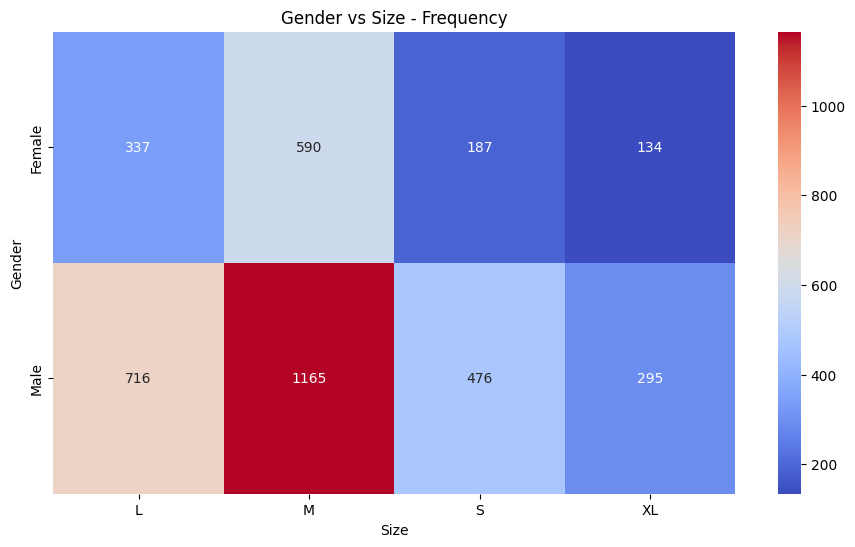

In [28]:

gender_size_ct = pd.crosstab(df['Gender'], df['Size'])

plt.figure(figsize=(11,6))
sns.heatmap(gender_size_ct, annot=True, fmt="d", cmap='coolwarm')
plt.title('Gender vs Size - Frequency')
plt.show()


### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

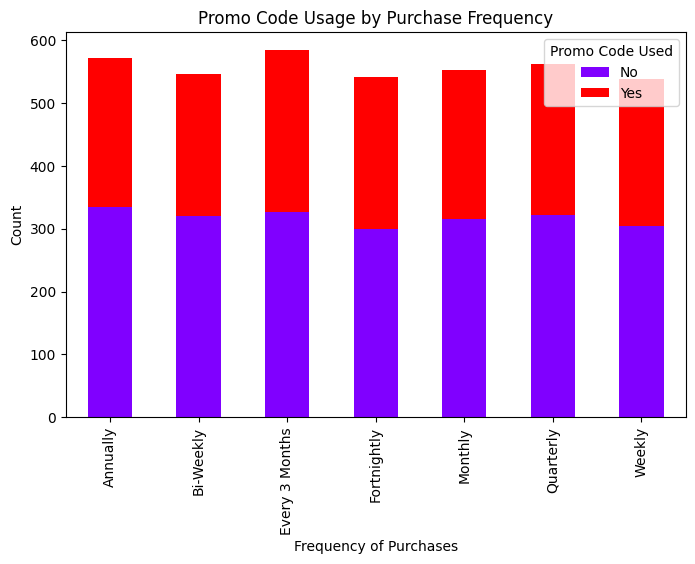

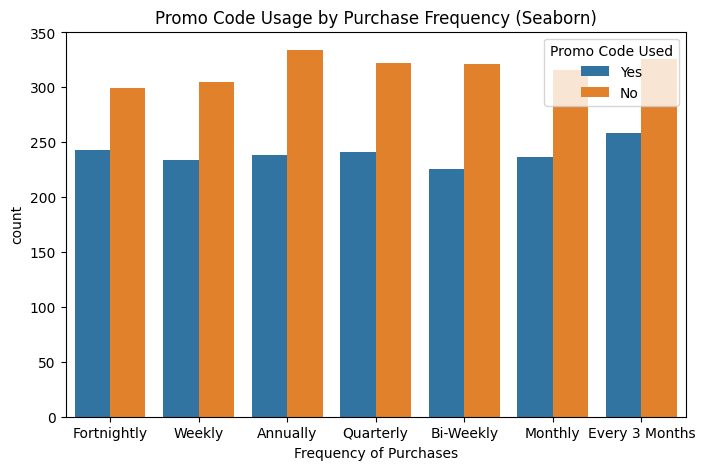

In [30]:
freq_promo_ct = pd.crosstab(df['Frequency of Purchases'], df['Promo Code Used'])

# Matplotlib
freq_promo_ct.plot(kind='bar', stacked=True, figsize=(8,5), colormap='rainbow')
plt.title('Promo Code Usage by Purchase Frequency')
plt.ylabel('Count')
plt.show()

# Seaborn
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Frequency of Purchases', hue='Promo Code Used')
plt.title('Promo Code Usage by Purchase Frequency (Seaborn)')
plt.show()


### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

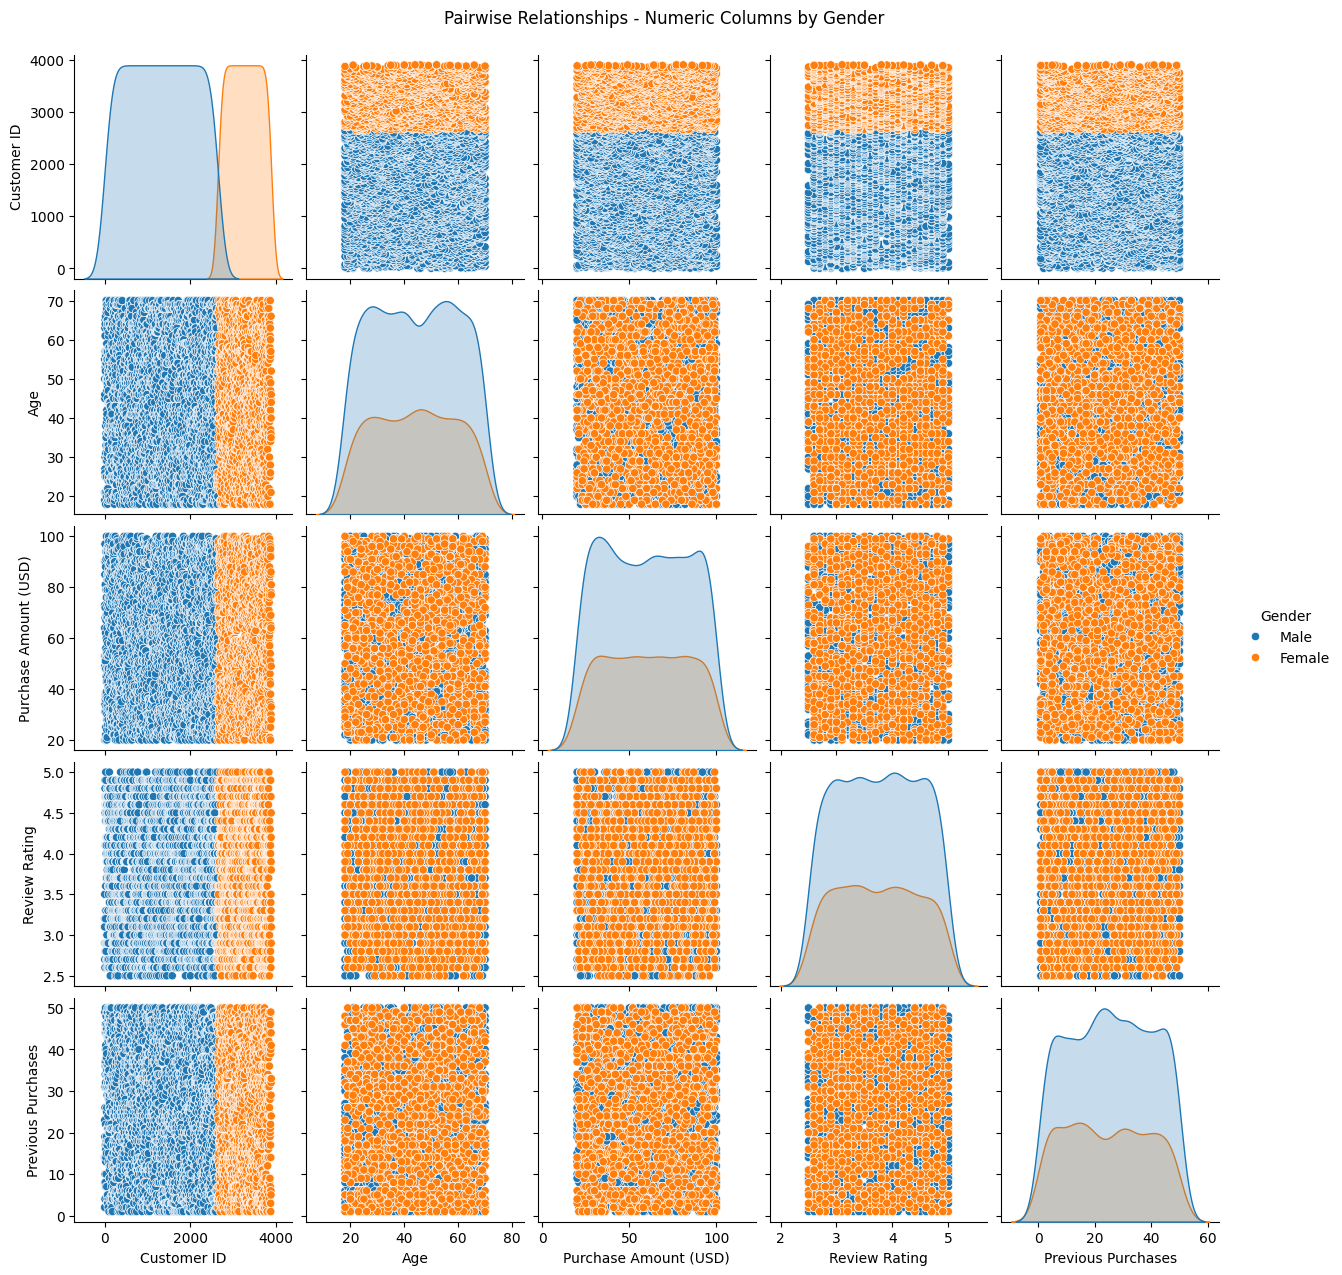

In [31]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[numeric_cols.tolist() + ['Gender']], hue='Gender')
plt.suptitle('Pairwise Relationships - Numeric Columns by Gender', y=1.02)
plt.show()